# Make Figure 5B:  Uniqueness of trans effect

Create a bar/dumbell plot to look at the number of genes that are significant in one or multiple cancers. 

Imports.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import cptac
import cptac.utils as u
import plot_utils as p

In [2]:
print('cptac version:', cptac.version())

cptac version: 0.8.5


# Step 1: Create sig column 

The sig column names all cancers with a sig comparison for the specific gene. First, get a df with p-values and differential expressions for all proteins across all 8 cancers.

In [3]:
all_df = pd.read_csv("../Make_Tables/csv/all_proteins.csv")
all_df

,Proteomics,GBM_P_Value,GBM_Median,HNSCC_P_Value,HNSCC_Median,LUAD_P_Value,LUAD_Median,LSCC_P_Value,LSCC_Median,BR_P_Value,BR_Median,OV_P_Value,OV_Median,EC_P_Value,EC_Median,CO_P_Value,CO_Median
0,ARMH3,5.766739e-07,-0.405134,0.024047,-0.135941,0.222235,-0.37845,0.080777,-0.44280,NaN,NaN,NaN,NaN,0.034811,0.1503,NaN,NaN
1,CUTC,8.514758e-07,-0.553255,0.014672,-0.314307,0.056523,-1.01995,0.074059,-0.44410,0.349469,-0.48080,0.985704,-0.159424,0.330823,-0.2533,0.917530,-0.08210
2,CUL2,2.783477e-06,-0.586396,0.677585,0.017886,0.868772,0.05695,0.517703,-0.25475,0.665878,0.17195,0.991659,0.033091,0.957970,0.0232,0.902073,-0.07690
3,PIP4K2A,2.783477e-06,-0.838882,0.038186,-0.224713,0.847730,0.04535,0.328457,0.11725,0.670623,-0.07435,0.985704,0.052955,0.502967,0.1690,0.883481,0.10135
4,GDI2,2.783477e-06,-0.610188,0.827100,0.001559,NaN,NaN,0.799442,-0.06375,0.789708,0.14995,0.985704,-0.067389,0.283190,0.1286,0.999502,-0.04450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,WTH3DI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.40100
15407,ZBED6CL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.11370
15408,ZIC4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00200
15409,ZNF419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38150


In [5]:
# create sig column values to show cancers with sig tests for each gene
for index, row in all_df.iterrows():
    cancer_names = ['GBM','HNSCC','LUAD','LSCC','BR','OV','EC','CO']
    label = []
    for cancer in cancer_names:
        if row[cancer+'_P_Value'] < 0.05:
            label.append(str(cancer))
    labeled = '_'.join(label)
    all_df.loc[index,'sig'] = str(labeled)
all_df[['Proteomics', 'sig']].head()

,Proteomics,sig
0,ARMH3,GBM_HNSCC_EC
1,CUTC,GBM_HNSCC
2,CUL2,GBM
3,PIP4K2A,GBM_HNSCC
4,GDI2,GBM


# Step 2: Keep genes significant in at least one cancer

First create the numSig column that counts the number of cancers with a significant test for the specific gene. 

In [6]:
def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05: 
            numSig += 1
            
    return numSig

In [9]:
# Create Num_sig column
all_df["Num_sig"] = all_df.loc[:,["GBM_P_Value","HNSCC_P_Value","LUAD_P_Value","LSCC_P_Value", "BR_P_Value","OV_P_Value","EC_P_Value","CO_P_Value"]].apply(Pvalue_sig, axis = 1)
all_df = all_df.sort_values(by=['Num_sig'],ascending=False)

#Keep trans genes that are significant in atleast 1 cancer. 
all_df1 = all_df[all_df['Num_sig'].isin([1,2,3,4,5,6,7,8])]
all_df1.head()


,Proteomics,GBM_P_Value,GBM_Median,HNSCC_P_Value,HNSCC_Median,LUAD_P_Value,LUAD_Median,LSCC_P_Value,LSCC_Median,BR_P_Value,BR_Median,OV_P_Value,OV_Median,EC_P_Value,EC_Median,CO_P_Value,CO_Median,sig,Num_sig
271,SLK,0.003506,-0.305757,0.005300,-0.443020,0.043043,-0.52600,0.031229,-0.47625,0.375369,-0.51380,0.985704,-0.122267,0.074890,0.4053,0.624087,-0.18140,GBM_HNSCC_LUAD_LSCC,4
17,ATE1,0.000225,-0.378204,0.039944,-0.128416,0.003010,-0.88365,0.006134,-0.63115,0.147739,-0.66100,0.986144,-0.000390,0.431900,0.0330,0.902073,-0.06000,GBM_HNSCC_LUAD_LSCC,4
417,CHUK,0.005715,-0.242224,0.023883,-0.224067,0.040510,-0.57880,0.043906,-0.60270,0.263329,-0.36610,0.985704,-0.222607,0.708913,-0.1043,0.897009,-0.01335,GBM_HNSCC_LUAD_LSCC,4
1299,PPP3CB,0.026590,-0.568576,0.127629,-0.254671,0.005592,-0.66985,0.037733,-0.66320,0.542176,-0.48775,0.997950,-0.035448,0.897392,0.0750,0.956566,0.13300,GBM_LUAD_LSCC,3
1591,MSH6,0.037125,0.461236,0.054613,0.514119,0.567581,0.16720,0.044259,1.42770,0.547482,0.35035,0.985704,0.281649,0.019773,-0.5370,0.983382,0.03200,GBM_LSCC_EC,3


# Step 3: Get df with total counts of significant genes

Get count of sig genes for each unique label of a single cancer or multiple cancers in the sig column. 
* NOTE: Lscc has 3 significant genes that are also significnat in other cancers. They are only counted in the overlapping columns and Lscc alone shows 0 unique genes. (See columns: Gbm_Hnscc_Lscc, Gbm_Lscc, Luad_Lscc) 

In [21]:
# Count the number of unique values in sig
vc = all_df1['sig'].value_counts()
df = vc.to_frame()

In [72]:
# Add cancers with no significant genes.
no_sig = {'CO': 0, 'BR': 0, 'OV': 0}
ns_df = pd.DataFrame.from_dict(no_sig, orient = 'index', columns=['sig'])

# Append not sig cancers
both = df.append(ns_df)

# Reindex to keep single cancers together
ordered = ['GBM', 'HNSCC', 'EC', 'LUAD', 'LSCC', 'OV', 'BR', 'CO', 
          'GBM_HNSCC', 'GBM_EC', 'HNSCC_EC', 'HNSCC_LUAD','GBM_HNSCC_EC', 'GBM_LUAD', 
          'GBM_HNSCC_LUAD', 'GBM_LSCC', 'HNSCC_LSCC', 'GBM_HNSCC_LSCC', 'GBM_HNSCC_LUAD_LSCC',
          'GBM_LSCC_EC', 'LSCC_EC', 'GBM_LUAD_LSCC', 'LUAD_LSCC', 'GBM_LUAD_EC', 'GBM_LUAD_OV']
both = both.reindex(ordered)

both = both.reset_index()
both = both.rename(columns = {'index': 'cancer'})
both

,cancer,sig
0,GBM,1615
1,HNSCC,346
2,EC,273
3,LUAD,48
4,LSCC,28
5,OV,0
6,BR,0
7,CO,0
8,GBM_HNSCC,125
9,GBM_EC,86


# Step 4: Create bar and dumbell plot

First, create a df with 4 y-axis points for the scatterplots. Values represent where the cancer label is on the y-axis. ('GBM': 7, 'HNSCC': 6, 'EC': 5, 'LUAD': 4, 'LSCC': 3, 'OV': 2, 'BR': 1, 'CO': 0) For a single cancer all 4 points are the same. For proteins that are significant in 4 cancers, each y-axis point represents a different cancer. NOTE: PTEN contains genes significant in up to 4 cancers.


In [59]:
# Create df with location of cancer points
y_points = {'GBM': 7, 'HNSCC': 6, 'EC': 5, 'LUAD': 4, 'LSCC': 3, 'OV': 2, 'BR': 1, 'CO': 0}
y1 = {}
y2 = {}
y3 = {}
y4 = {}

for c in ordered:
    c_list = c.split('_')
    num_sig = len(c_list)
    # Get first y point
    cancer1 = c_list[0]
    y1[c] = y_points[cancer1]
    
    # get other y points - combinations of y2, y3, y4 points are the same int when there are not 4 multiple cancers
    if num_sig == 1:
        y2[c] = y_points[cancer1]
        y3[c] = y_points[cancer1]
        y4[c] = y_points[cancer1]
    
    if num_sig == 2:
        cancer2 = c_list[1]
        y2[c] = y_points[cancer2]
        y3[c] = y_points[cancer2]
        y4[c] = y_points[cancer2]
    
    if num_sig == 3 :
        cancer2 = c_list[1]
        cancer3 = c_list[2]
        y2[c] = y_points[cancer2]
        y3[c] = y_points[cancer3]
        y4[c] = y_points[cancer3]
        
    if num_sig == 4:
        cancer2 = c_list[1]
        cancer3 = c_list[2]
        cancer4 = c_list[3]
        y2[c] = y_points[cancer2]
        y3[c] = y_points[cancer3]
        y4[c] = y_points[cancer4]

In [73]:
# Create df with location of cancer points 
     
# Create dfs for each y-axis point
y1_df = pd.DataFrame.from_dict(y1, orient = 'index', columns=['y1'])
y2_df = pd.DataFrame.from_dict(y2, orient = 'index', columns=['y2'])
y3_df = pd.DataFrame.from_dict(y3, orient = 'index', columns=['y3'])
y4_df = pd.DataFrame.from_dict(y4, orient = 'index', columns=['y4'])

# Join dfs
y_points_df = y1_df.join(y2_df)
y_points_df = y_points_df.join(y3_df)
y_points_df = y_points_df.join(y4_df)
y_points_df

# Reindex to keep single cancers together
y_points_df = y_points_df.reindex(ordered)
y_points_df

,y1,y2,y3,y4
GBM,7,7,7,7
HNSCC,6,6,6,6
EC,5,5,5,5
LUAD,4,4,4,4
LSCC,3,3,3,3
OV,2,2,2,2
BR,1,1,1,1
CO,0,0,0,0
GBM_HNSCC,7,6,6,6
GBM_EC,7,5,5,5


Create bar plot and dumbell plot. x-axis of dumbell plot follows order of bar plot. 

Text(0.5, 0, 'Cancer Overlaps')

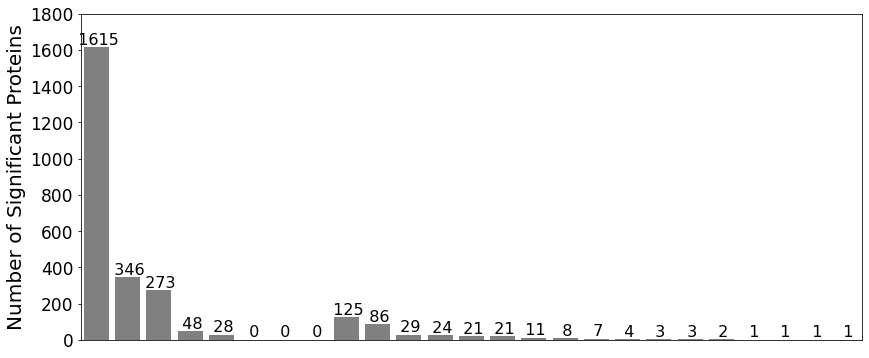

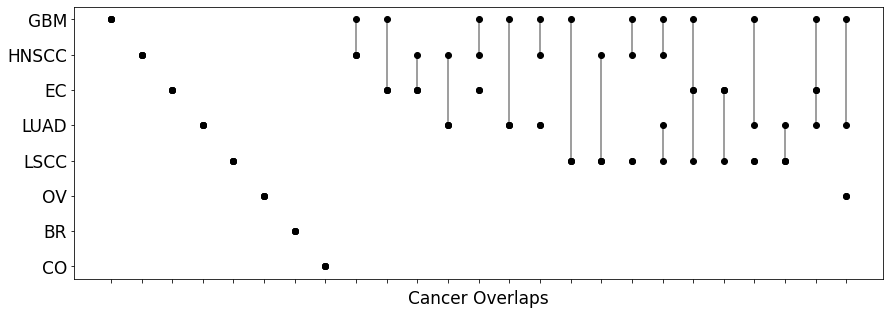

In [93]:
# Bar Plot
plt.figure(figsize=(14,6))
o = sns.barplot(x=both['cancer'], y=both['sig'], data=both, color='grey')
plt.setp(o.get_xticklabels(),rotation=90)

# Annotate count of sig genes above each bar
for p in o.patches:
    o.annotate('  {:.0f}'.format(p.get_height()), xy = (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom', color= 'black',size = 16)

o.set(ylim=(0, 1800))
o.set_xlabel('', size = 17)
o.set_ylabel('Number of Significant Proteins', size = 20)
o.get_xaxis().set_visible(False) # Hide x-axis
o.yaxis.set_tick_params(labelsize=17)



# Dumbell Plot
# Create vertical dumbell plot using scatterplots
plt.rcParams.update({'font.size': 17})
d = plt.figure(figsize=(14.5,5))
my_range=range(1,len(y_points_df.index)+1) #range count for x axis num
d = plt.vlines(x=my_range, ymin=y_points_df['y1'], ymax=y_points_df['y2'], color='black', alpha=0.5) #vertical lines
#d = plt.vlines(x=my_range, ymin=y_points_df['y2'], ymax=y_points_df['y3'], color='black', alpha=0.5)
d = plt.vlines(x=my_range, ymin=y_points_df['y3'], ymax=y_points_df['y4'], color='black', alpha=0.5)

d = plt.scatter(my_range, y_points_df['y1'], color='black', alpha=1) #plots first point
d = plt.scatter(my_range, y_points_df['y2'], color='black', alpha=1) # plots second point
d = plt.scatter(my_range, y_points_df['y3'], color='black', alpha=1) # plots third point
d = plt.scatter(my_range, y_points_df['y4'], color='black', alpha=1) # plots fourth point

# Add title and axis names
labels = list(y_points_df.index[:8]) # label 8 single cancer names y axis
labels.reverse()
plt.xticks(my_range, []) #none for x axis
plt.yticks(range(0,8), labels) # single cancer names
#plt.ylabel('Cancer')
plt.xlabel('Cancer Overlaps')

#o.figure.savefig("Fig_5B_barplot.png", dpi = 300)
#d.figure.savefig("Fig_5B_dumbell.png", dpi = 300)

* NOTE: Lscc has 3 significant genes that are also significnat in other cancers. They are only counted in the overlapping columns and Lscc alone shows 0 unique genes. (See columns: Gbm_Hnscc_Lscc, Gbm_Lscc, Luad_Lscc) 

# Get total number of genes significant in at least one cancer

In [79]:
#Keep trans genes that are significant in at least 1 cancer. 
total = all_df[all_df['Num_sig'].isin([1,2,3,4,5,6,7,8])]
total_count = len(total.Proteomics.unique())
print('Total significant genes in at least one cancer:', total_count)

Total significant genes in at least one cancer: 2658


# Calculate percentage of genes significant in only one cancer

In [80]:
#Keep trans genes that are significant in 1 cancer. 
one = all_df[all_df['Num_sig'].isin([1])]
one_count = len(one.Proteomics.unique())
print('Significant genes in only one cancer:', one_count)
print('Percent:', one_count / total_count * 100)

Significant genes in only one cancer: 2310
Percent: 86.90744920993228


# Calculate percentage of genes significant in multiple cancers

In [81]:
#Keep trans genes that are significant in multiple cancers. 
mult = all_df[all_df['Num_sig'].isin([2,3])]
mult_count = len(mult.Proteomics.unique())
print('Significant genes in multiple cancers:', mult_count)
print('Percent:', mult_count / total_count * 100)

Significant genes in multiple cancers: 345
Percent: 12.979683972911966


In [82]:
# check 3 lscc sig genes
l = all_df.loc[all_df['Lscc_P_Value'] < 0.05]
l[['Proteomics', 'Lscc_P_Value', 'Gbm_P_Value', 'Hnscc_P_Value', 'Luad_P_Value','sig']]

KeyError: 'Lscc_P_Value'